# Video Game Sales Data Analysis - Team Ivysaur
## Members:
### Mert Uyğur, Umut Can Demirkaynak, Muhammed Murat Göktaş

***

## Importing necessary libraries and data

In [1]:
import sys
sys.path.append('../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from vgs.config import vgsales

 ***

## Overview and Some Data Cleaning 

In [2]:
vgsales.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

#### Dropping Rank columns which serves nothing

In [3]:
vgsales.drop(columns="Rank",inplace=True)

In [4]:
vgsales.isnull().values.any()

True

#### Detecting how many missing values and which

In [5]:
null_columns = vgsales.columns[vgsales.isnull().any()]
vgsales[null_columns].isnull().sum()

Year         271
Publisher     58
dtype: int64

 #### Dropping null values since it is not much and will not effect our 

In [6]:
vgsales = vgsales.dropna()

In [7]:
vgsales.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### There was an incomplete value of game in 2020 distracting our dataset, we removed values after year 2017.

In [8]:
vgsales = vgsales[vgsales["Year"]<2017.0]

In [9]:
vgsales.shape

(16287, 10)

 ***
# Explotary Data Analysis

***

### Platforms

#### How many different platforms?

In [10]:
vgsales['Platform'].nunique()

31

#### The amount of games the platforms released between 1980-2016 

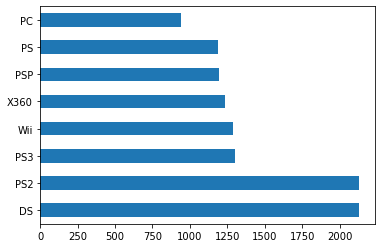

In [42]:
vgsales['Platform'].value_counts()[:8].plot(kind="barh");

#### Platforms that have the most global sales amount also by region

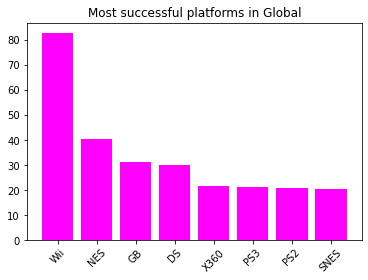

In [74]:
plt.bar(data=vgsales.head(20), x='Platform', height='Global_Sales', color = 'magenta')
plt.xticks(rotation=45)
plt.title('Most successful platforms in Global')
plt.show()

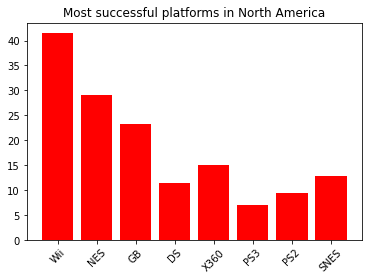

In [13]:
plt.bar(data=vgsales.head(20), x='Platform', height='NA_Sales', color = 'red')
plt.xticks(rotation=45)
plt.title('Most successful platforms in North America')
plt.show()

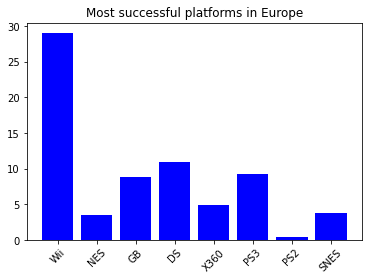

In [79]:
plt.bar(data=vgsales.head(20), x='Platform', height='EU_Sales', color = 'blue')
plt.xticks(rotation=45)
plt.title('Most successful platforms in Europe')
plt.show()

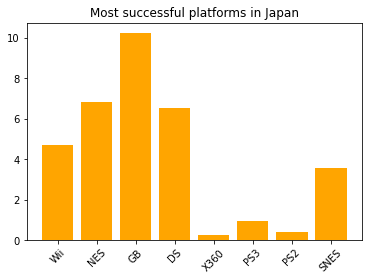

In [14]:
plt.bar(data=vgsales.head(20), x='Platform', height='JP_Sales', color = 'orange')
plt.xticks(rotation=45)
plt.title('Most successful platforms in Japan')
plt.show()

### Games

In [44]:
vgsales['Name'].nunique()

11322

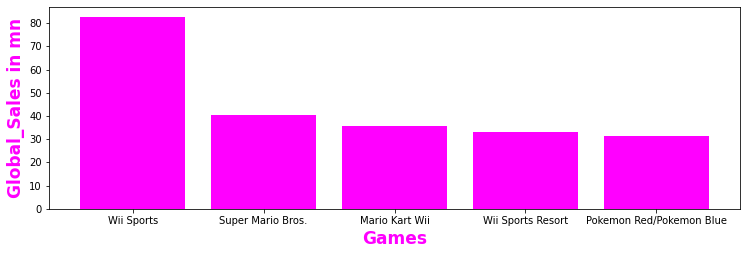

In [73]:
height = vgsales['Global_Sales'][:5]
bars = vgsales['Name'][:5]
plt.bar(bars, height, color='magenta')
plt.subplots_adjust(left=-0.7, bottom=0.1, right=0.9, top=0.8)
# Custom Axis title
plt.xlabel('Games', fontweight='bold', color = 'magenta', fontsize='17', horizontalalignment='center');
plt.ylabel('Global_Sales in mn', fontweight='bold', color='magenta', fontsize='17');

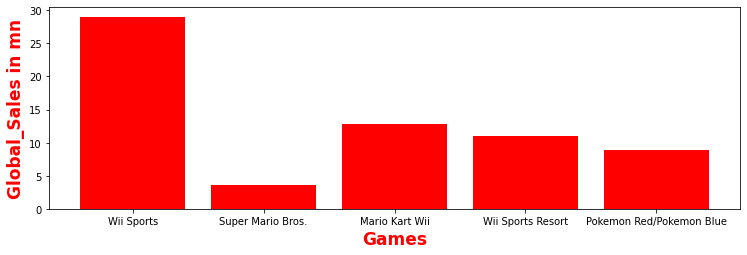

In [77]:
height = vgsales['NA_Sales'][:5]
bars = vgsales['Name'][:5]
plt.bar(bars, height, color='red')
plt.subplots_adjust(left=-0.7, bottom=0.1, right=0.9, top=0.8)
# Custom Axis title
plt.xlabel('Games', fontweight='bold', color = 'red', fontsize='17', horizontalalignment='center');
plt.ylabel('Global_Sales in mn', fontweight='bold', color='red', fontsize='17');

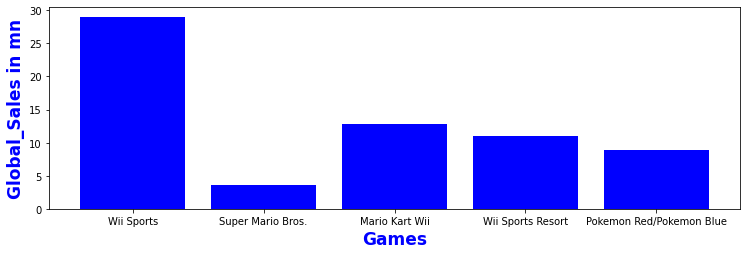

In [80]:
height = vgsales['EU_Sales'][:5]
bars = vgsales['Name'][:5]
plt.bar(bars, height, color='blue')
plt.subplots_adjust(left=-0.7, bottom=0.1, right=0.9, top=0.8)
# Custom Axis title
plt.xlabel('Games', fontweight='bold', color = 'blue', fontsize='17', horizontalalignment='center');
plt.ylabel('Global_Sales in mn', fontweight='bold', color='blue', fontsize='17');

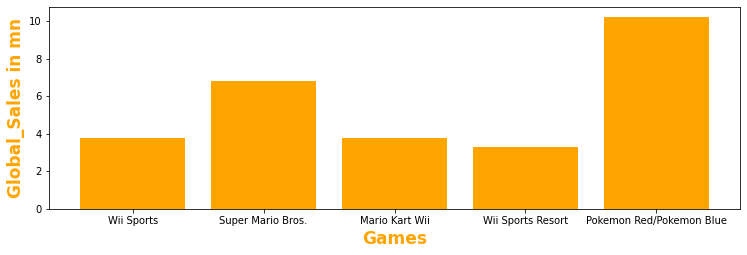

In [78]:
height = vgsales['JP_Sales'][:5]
bars = vgsales['Name'][:5]
plt.bar(bars, height, color='orange')
plt.subplots_adjust(left=-0.7, bottom=0.1, right=0.9, top=0.8)
# Custom Axis title
plt.xlabel('Games', fontweight='bold', color = 'orange', fontsize='17', horizontalalignment='center');
plt.ylabel('Global_Sales in mn', fontweight='bold', color='orange', fontsize='17');

### Time

In [102]:
vgsales['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
2006.0    1008
2005.0     936
2002.0     829
2003.0     775
2004.0     744
2012.0     655
2015.0     614
2014.0     580
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     342
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year, dtype: int64